<a href="https://colab.research.google.com/github/Reyhan-Code/skripsi/blob/Machine-Learning/Salinan_dari_PendeteksiJamur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import zipfile
import gdown
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
# from google.colab import drive
from PIL import Image

In [2]:
# Ganti dengan ID file Anda
file_id = '1612QhGakZUQjDPMz-HnGXTVmPr7Klu_d'
url = f'https://drive.google.com/uc?id={file_id}'

# Lokasi tempat menyimpan file zip yang diunduh
zip_path = '/content/dataset_jamur2.zip'

# Mengunduh file
gdown.download(url, zip_path, quiet=False)

# Ekstrak file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/my_folder')

Downloading...
From (original): https://drive.google.com/uc?id=1612QhGakZUQjDPMz-HnGXTVmPr7Klu_d
From (redirected): https://drive.google.com/uc?id=1612QhGakZUQjDPMz-HnGXTVmPr7Klu_d&confirm=t&uuid=c8ce53d9-b105-4c03-b560-eb733363f144
To: /content/dataset_jamur2.zip
100%|██████████| 290M/290M [00:05<00:00, 54.1MB/s]


In [6]:
# Update base_dir
base_dir = '/content/my_folder/jamur_dataset2/jamur_dataset' # Adjust to the new extraction path
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [7]:
def load_images_from_directory(directory, width, height):
    image_data = []
    image_target = []
    classes = os.listdir(directory)
    for title in classes:
        class_dir = os.path.join(directory, title)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                try:
                    with Image.open(img_path) as img:
                        img = img.convert("RGB")
                        img = img.resize((width, height))
                        img_array = np.array(img)
                        image_data.append(img_array)
                        image_target.append(title)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    return np.array(image_data), np.array(image_target)

In [8]:
train_images, train_labels = load_images_from_directory(train_dir, 224, 224)
validation_images, validation_labels = load_images_from_directory(validation_dir, 224, 224)

train_images = train_images.astype('float32') / 255.0
validation_images = validation_images.astype('float32') / 255.0

lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
validation_labels = lb.transform(validation_labels)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [9]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(len(lb.classes_), activation='softmax'))

for layer in base_model.layers:
    layer.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
# model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=32,
    validation_data=(validation_images, validation_labels)
)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.1433 - loss: 2.7872 - val_accuracy: 0.3975 - val_loss: 1.8353
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.3250 - loss: 2.0341 - val_accuracy: 0.6200 - val_loss: 1.4225
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5031 - loss: 1.5214 - val_accuracy: 0.6875 - val_loss: 1.1867
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5896 - loss: 1.3178 - val_accuracy: 0.7200 - val_loss: 1.0381
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.6469 - loss: 1.0876 - val_accuracy: 0.7400 - val_loss: 0.9480
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.6834 - loss: 1.0055 - val_accuracy: 0.7575 - val_loss: 0.8891
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7334 - loss: 0.8814 - val_accuracy: 0.7750 - val_loss: 0.8384
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7564 - loss: 0.8370 - val_accuracy: 0.7825 - va

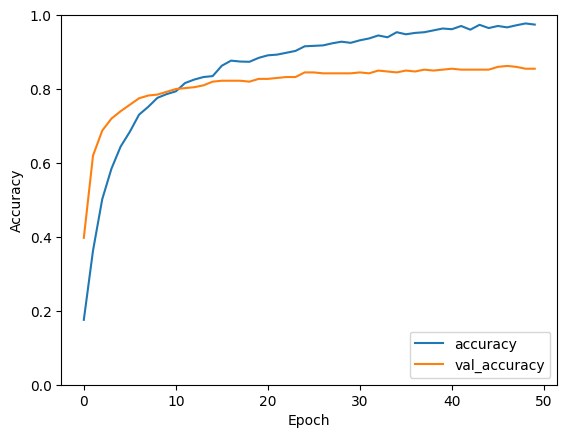

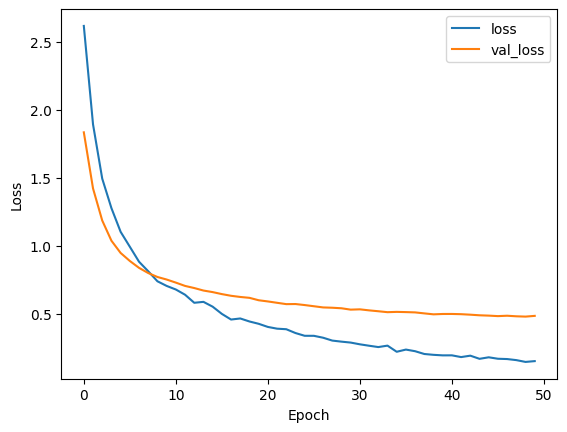

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [12]:
print(os.listdir(train_dir))
print(os.listdir(validation_dir))

['Chlorophyllum molybdites', 'Mycena leaiana', 'jamur Lentinus Squarrosulus', 'Jamur Tiram', 'Amanita phalloides', 'Jamur Merang', 'Leucoagaricus leucothites', 'Coprinopsis lagopus', 'jamur kuping', 'Jamur Barat']
['Chlorophyllum molybdites', 'Mycena leaiana', 'jamur Lentinus Squarrosulus', 'Jamur Tiram', 'Amanita phalloides', 'Jamur Merang', 'Leucoagaricus leucothites', 'Coprinopsis lagopus', 'jamur kuping', 'Jamur Barat']


In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_images, validation_labels)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy * 100:.2f}%')

# Predict classes
y_pred = np.argmax(model.predict(validation_images), axis=1)
y_true = np.argmax(validation_labels, axis=1)

# Calculate validation accuracy
val_accuracy = accuracy_score(y_true, y_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Print confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred))
print('Classification Report:')
print(classification_report(y_true, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8854 - loss: 0.3926
Loss: 0.4854
Accuracy: 85.50%
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step
Validation Accuracy: 85.50%
Confusion Matrix:
[[34  1  0  1  0  0  4  0  0  0]
 [ 1 37  0  0  0  0  1  0  1  0]
 [ 0  2 37  0  0  0  0  0  0  1]
 [ 3  0  5 30  2  0  0  0  0  0]
 [ 5  0  5  0 18  2  1  0  5  4]
 [ 0  0  0  1  2 35  0  0  2  0]
 [ 0  1  0  0  1  1 37  0  0  0]
 [ 0  0  0  0  0  0  0 39  1  0]
 [ 0  0  2  0  0  2  0  0 36  0]
 [ 0  0  0  0  0  0  0  1  0 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        40
           1       0.90      0.93      0.91        40
           2       0.76      0.93      0.83        40
           3       0.94      0.75      0.83        40
           4       0.78      0.45      0.57        40
           5       0.88      0.88      0.88        40
           6       0.86      0.93      0.89        40
           7       0.97  

In [14]:
model.save('model.h5')

In [16]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('modelJamurBaru.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model has been converted to TFLite and saved as 'model.tflite'")

Saved artifact at '/tmp/tmpifljauyl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  133795804107120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133795804362032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133795803724464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133795803724112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133795803723232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133795803725520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133795802324080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133795802325136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133795802321264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133795802323904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133795817

In [18]:
img_path = '/content/463549072_968475678646479_2051839524113474531_n.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Define class labels
labels = [
    'Amanita phalloides',
    'Chlorophyllum molybdites',
    'Coprinopsis lagopus',
    'Jamur Barat',
    'Jamur Merang',
    'Jamur Tiram',
    'Leucoagaricus leucothites',
    'Mycena leaiana',
    'jamur Lentinus Squarrosulus',
    'jamur kuping'
]

# Make a prediction
prediction = model.predict(img_array)
index = np.argmax(prediction)
class_names = labels[index]

# Print prediction results
accuracy = np.max(prediction) * 100
predicted_class = class_names
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Save the model
model.save("model.h5")

# # Evaluate the model on the validation set
# val_predictions = model.predict(validation_images)
# val_predictions_classes = np.argmax(val_predictions, axis=1)
# val_true_classes = np.argmax(validation_labels, axis=1)

# # Print evaluation metrics
# print("Accuracy: ", accuracy_score(val_true_classes, val_predictions_classes))
# print("Classification Report:\n", classification_report(val_true_classes, val_predictions_classes, target_names=labels))
# print("Confusion Matrix:\n", confusion_matrix(val_true_classes, val_predictions_classes))

# # Visualize the confusion matrix
# conf_matrix = confusion_matrix(val_true_classes, val_predictions_classes)
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Predicted Class: Amanita phalloides
Prediction Accuracy: 76.44%
